Question 1

from 0 to 50
f1(x) = x

from 51 to 150
f2(x) = (155x / 100) + (255 - (155*150/100))

from 151 to 255
f3(x) = x

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [31]:
image = cv.imread('emma.jpeg', cv.IMREAD_GRAYSCALE)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

t1 = np.arange(0,51).astype(np.uint8)
t2 = (np.arange(51,151).astype(np.uint8))*1.55 + (255 - 155*1.5)
t3 = np.arange(151,256).astype(np.uint8)
t = np.concatenate((t1,t2,t3)).astype(int)

print(len(t))


256


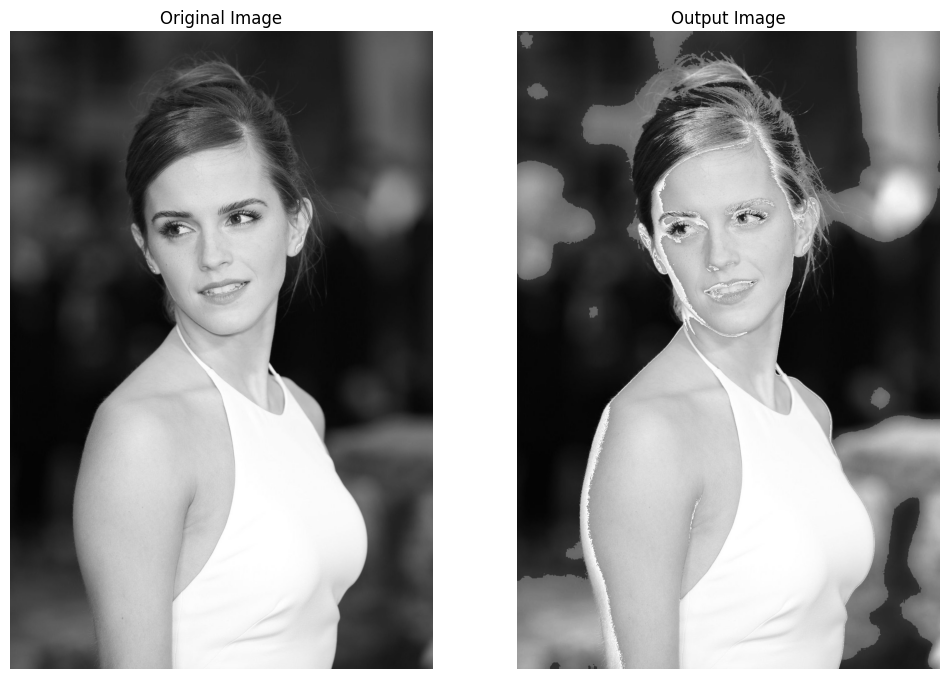

In [34]:

g = t[image]

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(g, cmap = 'gray')
plt.title('Output Image')
plt.axis('off')

plt.show()
